In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start = '2017-01-01'
end = '2022-01-01'

In [3]:
data = yf.download('CL=F PTTEP.BK', start= start, end= end)

[*********************100%***********************]  2 of 2 completed


In [4]:
df = data['Adj Close']

In [5]:
df

,CL=F,PTTEP.BK
Date,,
2017-01-03,52.330002,NaN
2017-01-04,53.259998,78.292854
2017-01-05,53.759998,77.895424
2017-01-06,53.990002,78.292854
2017-01-09,51.959999,77.696716
...,...,...
2021-12-27,75.570000,118.000000
2021-12-28,75.980003,119.000000
2021-12-29,76.559998,118.500000


In [6]:
df2 = data['Adj Close'].pct_change()
df2

,CL=F,PTTEP.BK
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.017772,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007614
...,...,...
2021-12-27,0.024122,0.004255
2021-12-28,0.005425,0.008475
2021-12-29,0.007634,-0.004202


In [7]:
df2['PTTEP Shift'] = df2['PTTEP.BK'].shift(-1)
# เตรียมตารางเพื่อดูราคาน้ำมันวันนี้ ว่ามีผลต่อ ราคา PTTEP พรุ่งนี้แค่ไหน

In [8]:
df2

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.017772,NaN,-0.005076
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
...,...,...,...
2021-12-27,0.024122,0.004255,0.008475
2021-12-28,0.005425,0.008475,-0.004202
2021-12-29,0.007634,-0.004202,-0.004219


In [9]:
df2.plot.scatter(x= 'CL=F', y= 'PTTEP Shift')

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

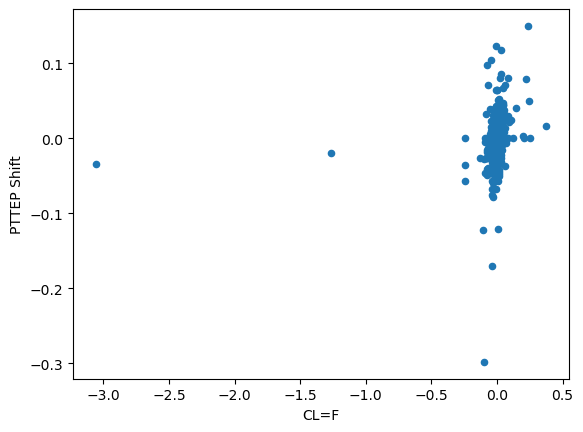

In [10]:
plt.show()

In [11]:
df2.loc[df2['CL=F'] < -0.5]

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2020-04-20,-3.059661,0.03268,-0.034810
2020-04-21,-1.266011,-0.03481,-0.019672


In [12]:
df2 = df2.loc[df2['CL=F'] >= -0.5]

In [13]:
df2.plot.scatter(x= 'CL=F', y= 'PTTEP Shift')

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

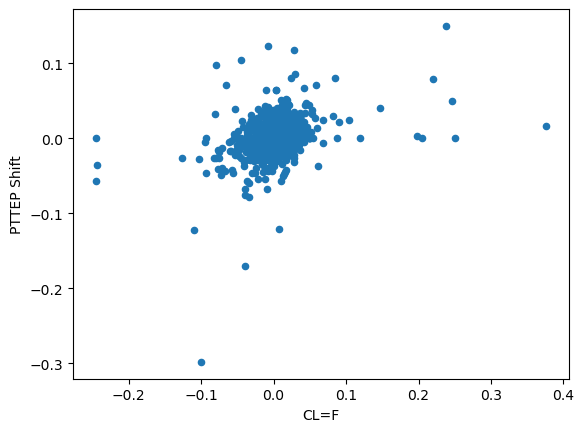

In [14]:
plt.show()

In [15]:
df2.loc['2020-04-15':'2020-06-01'].plot()

<AxesSubplot:xlabel='Date'>

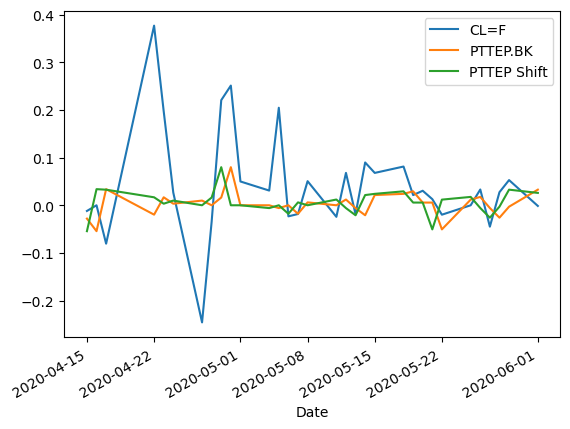

In [16]:
plt.show()
# แสดงให้เห็นถึงช่วงเวลาน้ำที่น้ำมันเกิด Crisis

In [17]:
df_clean = df2.loc[:'2020-04-13'].append(df2.loc['2020-05-10':])

In [18]:
df_clean.plot(figsize= (16,6))

<AxesSubplot:xlabel='Date'>

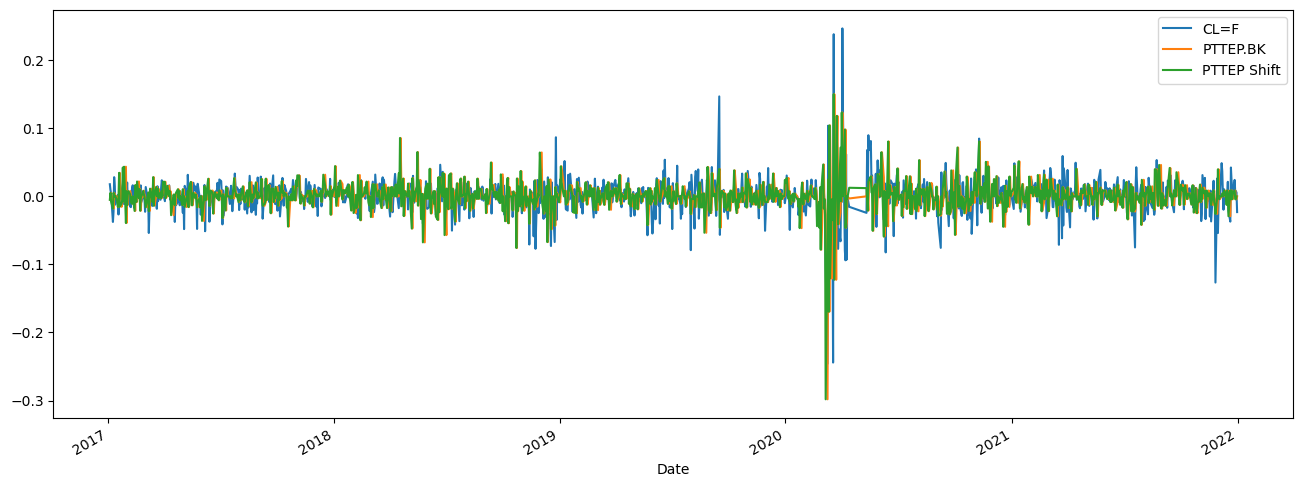

In [19]:
plt.show()

In [20]:
df_clean.plot.scatter(x='CL=F', y='PTTEP Shift')

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

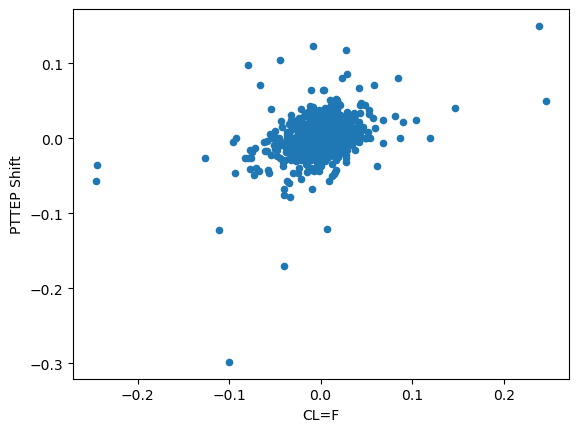

In [21]:
plt.show()

In [22]:
df_clean = df_clean.dropna()

In [23]:
X = df_clean['CL=F']
y = df_clean['PTTEP Shift']

In [24]:
m,c = np.polyfit(X,y,1)

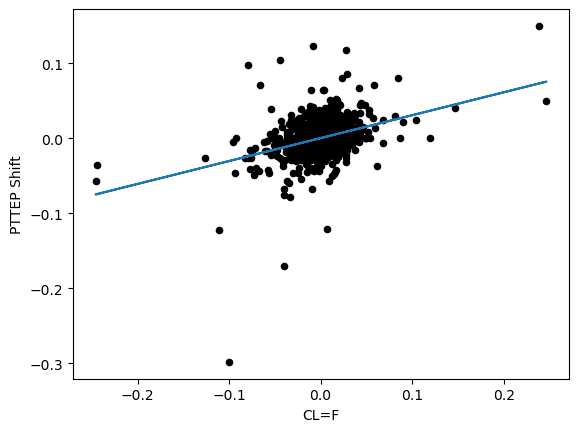

In [25]:
df_clean.plot.scatter(x='CL=F', y='PTTEP Shift', c='k')
plt.plot(X, m*X+c)
plt.show()

# ตัด Outlier เพิ่ม

In [26]:
df_clean.drop('PTTEP.BK', axis=1, inplace=True)
# drop PTTEP ของวันนี้ทิ้ง ใช้แต่วันพรุ่งนี้

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
Lower_limit = df_clean.quantile(0.01)
Upper_limit = df_clean.quantile(0.99)

In [28]:
Lower_limit

CL=F          -0.076044
PTTEP Shift   -0.051325
Name: 0.01, dtype: float64

In [29]:
Upper_limit

CL=F           0.058736
PTTEP Shift    0.064471
Name: 0.99, dtype: float64

In [30]:
(df_clean < Lower_limit) | (df_clean > Upper_limit)
# เรียกดูอันที่น้อยกว่า หรือ มากกว่าลิมิต

,CL=F,PTTEP Shift
Date,,
2017-01-05,False,False
2017-01-06,False,False
2017-01-09,False,False
2017-01-10,False,False
2017-01-11,False,False
...,...,...
2021-12-24,False,False
2021-12-27,False,False
2021-12-28,False,False


In [31]:
df_cleaner = df_clean[~((df_clean < Lower_limit) | (df_clean > Upper_limit)).any(1)]
df_cleaner

,CL=F,PTTEP Shift
Date,,
2017-01-05,0.009388,0.005102
2017-01-06,0.004278,-0.007614
2017-01-09,-0.037600,-0.017903
2017-01-10,-0.021940,0.005208
2017-01-11,0.028139,0.002591
...,...,...
2021-12-24,0.000000,0.004255
2021-12-27,0.024122,0.008475
2021-12-28,0.005425,-0.004202


In [32]:
len(df_cleaner.index)

#นับ index ที่เหลือ

1229

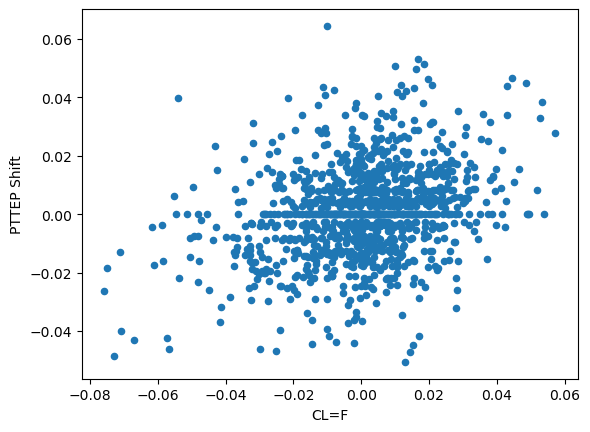

In [33]:
df_cleaner.plot.scatter(x= 'CL=F', y= 'PTTEP Shift')
plt.show()

In [34]:
X = df_cleaner['CL=F']
y = df_cleaner['PTTEP Shift']
m,c = np.polyfit(X,y,1)

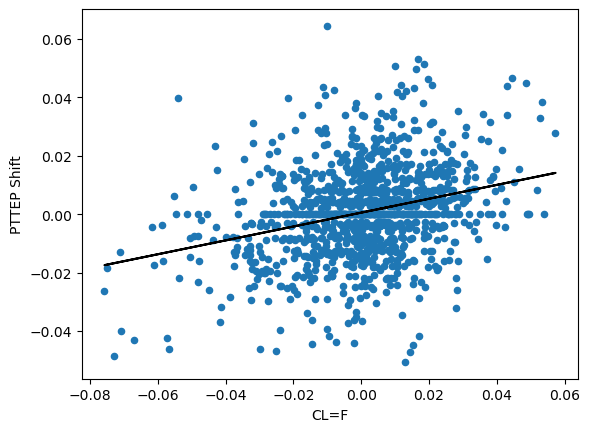

In [35]:
df_cleaner.plot.scatter(x= 'CL=F', y= 'PTTEP Shift')
plt.plot(X, m*X+c, color='k')
plt.show()

In [36]:
print('slope = '+str(m))
print('intercept = '+str(c))

slope = 0.23751440399102441
intercept = 0.0005170978826633025


In [37]:
df_cleaner.corr()

,CL=F,PTTEP Shift
CL=F,1.000000,0.292473
PTTEP Shift,0.292473,1.000000


In [38]:
df_rolling_corr = df_cleaner['CL=F'].rolling(60).corr(df_cleaner['PTTEP Shift'])

In [39]:
df_rolling_corr.plot()

<AxesSubplot:xlabel='Date'>

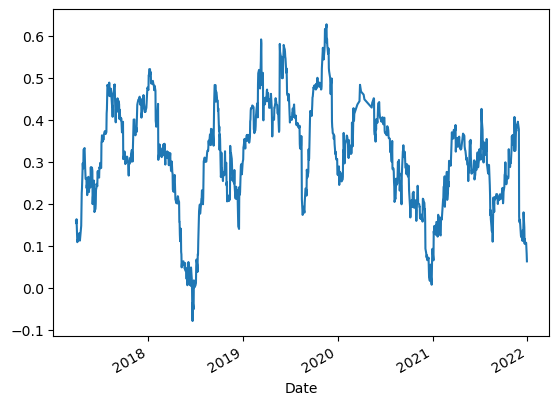

In [40]:
plt.show()

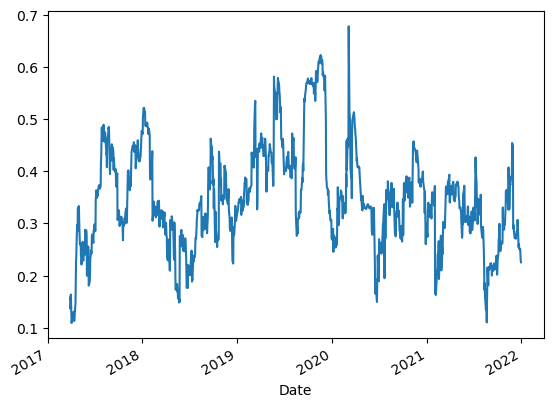

In [41]:
df2['CL=F'].rolling(60).corr(df2['PTTEP Shift']).plot()
plt.show()

In [ ]:
f